In [10]:
import numpy as np
import os
import colorsys
import matplotlib.pyplot as plt

The inputs to this pipeline are 

* path to modified kallisto

* path to reference mouse transcriptoime

* paths to the chromosomes of mouse genome (to be put without spaces in ./hisat_chr_path_list.txt)

In [18]:
modified_kallisto_path='/data/SS_RNA_seq/Code/kalliPso'
mouse_reference='/data/SS_RNA_seq/Zeisel/reference_transcriptome/Mus_musculus.GRCm38.rel79.cdna.all.fa'

Run the script

In [21]:
os.system('python time_test.py -k '+modified_kallisto_path+' -r '+ mouse_reference+' -h ./hisat_chr_path_list.txt')

0

In [22]:
with open('/data/SS_RNA_seq/Code/clustering_on_reads/Timing_pipeline/TCC/time.time') as f:
    TCC=float(f.readline())
with open('/data/SS_RNA_seq/Code/clustering_on_reads/Timing_pipeline/bowtie1/time.time') as f:
    bowtie1=float(f.readline())
with open('/data/SS_RNA_seq/Code/clustering_on_reads/Timing_pipeline/hisat/time.time') as f:
    hisat=float(f.readline())
with open('/data/SS_RNA_seq/Code/clustering_on_reads/Timing_pipeline/kallisto/time.time') as f:
    kallisto=float(f.readline())
with open('/data/SS_RNA_seq/Code/clustering_on_reads/Timing_pipeline/wc/time.time') as f:
    wc=float(f.readline())

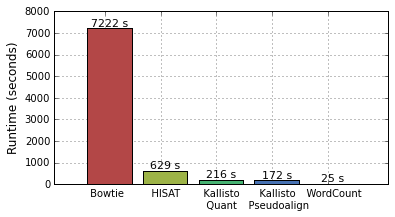

In [23]:
%matplotlib inline
N = 5
N_sets = N
HSV_tuples = [(x*1.0/N_sets, 0.6, 0.7) for x in range(N_sets)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

menMeans = ( bowtie1, hisat, kallisto,TCC,wc)

ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()
plt.gcf().subplots_adjust(bottom=0.3)
rects1 = ax.bar(ind, menMeans, width=0.8, color=RGB_tuples,zorder=4, align='center')
methods = [' Bowtie', '   HISAT','   Kallisto\n   Quant','   Kallisto\n    Pseudoalign','    WordCount']
plt.grid()


xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] -0.2 for patch in rects1]
plt.xticks(xticks_pos, methods, ha='center', rotation=0, size=10)

rects = ax.patches
hts=map(lambda x: str(int(x))+' s',menMeans)
for rect, ht in zip(rects, hts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, ht, ha='center', va='bottom',fontsize=11)

plt.ylabel('Runtime (seconds)',size=12)

save_name = 'runtimes' 
plt.show()